## Relatório Modelo :

O problema que estamos resolvendo é de classificação, pois queremos prever a categoria "Yearly_wage", podendo ser >50K ou <=50K. A coluna Education foi deletada, pois Education_num já contém a mesma informação com  tipo numérico. A coluna Fnlwgt também foi retirada pois grande maioria dos dados tendia a zero e continha alguns outliers muito extremos. Para normalizar os dados foi utilizado StandardScaler do sklearn. As linhas que continham dados faltantes também foram retiradas. Além disso foi necessário as categorias não numéricas em numéricas. Para encontrar o melhor modelo, foram escolhidos os seguintes algoritmos de classificação Gaussian Naive Bayes, Support Vector Classification, Logistic Regression, KNeighborsClassifier e DecisionTreeClassifier. Para decidir, qual é o melhor modelo serão levados os seguintes aspectos precision (Porcentagem das previsões que estavam corretas), recall (Porcentagem dos casos positivos identificados), F1 (Porcentagem de previsões positivas corretas), and support scores (Número de ocorrências da classe no conjunto de dados especificado). E também a curva AUC para verifica o quão bem ele distingue entre >50K e <=50K.

Abaixo está o sumário para cada modelo e seus resultados:

* [Gaussian Naive Bayes](#GaussianNaiveBayes)
* [Support Vector Classification](#SupportVectorClassification)
* [Logistic Regression](#LogisticRegression)
* [KNeighborsClassifier](#KNeighborsClassifier)
* [DecisionTreeClassifier](#DecisionTreeClassifier)

O modelo KNeighborsClassifier obteve alta precisão e uma curva AUC boa comparado aos outros modelos,além disso não sofreu tanto quanto os outros, pelo fato dos dados estarem desbalanceado (muito mais 0 do que 1) para recall e f1-score, embora estes estejam a aquém do ideal, por isso o modelo KNeighborsClassifier foi o escolhido.

In [1]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo

In [2]:
#graficos
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticksplt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

In [3]:
#read files
data_train = pd.read_csv("wage_train.csv")

In [4]:
#Verificar a integridade dos dados
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32560 non-null  int64 
 1   age             32560 non-null  int64 
 2   workclass       32560 non-null  object
 3   fnlwgt          32560 non-null  int64 
 4   education       32560 non-null  object
 5   education_num   32560 non-null  int64 
 6   marital_status  32560 non-null  object
 7   occupation      32560 non-null  object
 8   relationship    32560 non-null  object
 9   race            32560 non-null  object
 10  sex             32560 non-null  object
 11  capital_gain    32560 non-null  int64 
 12  capital_loss    32560 non-null  int64 
 13  hours_per_week  32560 non-null  int64 
 14  native_country  32560 non-null  object
 15  yearly_wage     32560 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [5]:
data_train.isnull().sum()

Unnamed: 0        0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
yearly_wage       0
dtype: int64

In [6]:
data_train.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education_num', 'marital_status', 'occupation', 'relationship', 'race',
       'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
       'native_country', 'yearly_wage'],
      dtype='object')

In [7]:
#elimicar coluna inutil Unnamed
data_train.drop(['Unnamed: 0'], axis = 'columns', inplace = True)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  yearly_wage     32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
#eliminar linhas com dados faltantes
data_train.drop(data_train[data_train['occupation'] == ' ?'].index, inplace = True)
data_train.drop(data_train[data_train['native_country'] == ' ?'].index, inplace = True)
data_train.drop(data_train[data_train['workclass'] == ' ?'].index, inplace = True)

#Estatisticas gerais sobre os dados
data_train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30161.000000,3.016100e+04,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437883,1.897976e+05,10.121216,1091.971984,88.375419,40.931269
std,13.134882,1.056527e+05,2.549983,7406.466659,404.304753,11.980182
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176280e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784290e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376300e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
#eliminar atributos que não serão utilizados
data_train=data_train.drop(['education', 'fnlwgt'], axis = 1)

In [10]:
#criar numeros para strings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_train['workclass'] = le.fit_transform(data_train['workclass'])
data_train['marital_status'] = le.fit_transform(data_train['marital_status'])
data_train['occupation'] = le.fit_transform(data_train['occupation'])
data_train['relationship'] = le.fit_transform(data_train['relationship'])
data_train['race'] = le.fit_transform(data_train['race'])
data_train['sex'] = le.fit_transform(data_train['sex'])
data_train['native_country'] = le.fit_transform(data_train['native_country'])
data_train['yearly_wage'] = le.fit_transform(data_train['yearly_wage'])

data_train.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
0,50,4,13,2,3,0,4,1,0,0,13,38,0
1,38,2,9,0,5,1,4,1,0,0,40,38,0
2,53,2,7,2,5,0,2,1,0,0,40,38,0
3,28,2,13,2,9,5,2,0,0,0,40,4,0
4,37,2,14,2,3,5,4,0,0,0,40,38,0


In [11]:
#standard normal distribution
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc=StandardScaler()
ds_x = data_train.drop('yearly_wage',axis='columns')
y=data_train['yearly_wage']
dataset=sc.fit_transform(ds_x)
x = pd.DataFrame(dataset,columns=ds_x.columns)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

In [12]:
X_train.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
19883,0.347334,-0.208884,-1.616201,1.615437,0.258090,-0.261254,-2.010994,-1.443370,-0.147437,-0.21859,-0.077735,0.264929
18110,-0.109472,-0.208884,0.344629,-1.722362,0.009915,-0.261254,-2.010994,0.692823,-0.147437,-0.21859,0.590045,0.264929
7844,-1.556026,-0.208884,-0.439703,0.947877,-0.238260,0.987703,0.385055,0.692823,-0.147437,-0.21859,-1.580242,0.264929
21845,1.032544,-0.208884,-0.047537,-1.722362,-1.479133,-0.261254,0.385055,-1.443370,-0.147437,-0.21859,-0.077735,0.264929
29832,-1.175354,-1.257334,1.128961,0.947877,0.754439,0.987703,-3.209019,-1.443370,-0.147437,-0.21859,-0.495098,-5.631524


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn import metrics

## Gaussian Naive Bayes <a class="anchor" id="GaussianNaiveBayes"></a>

In [14]:
# Criando modelo e treinando com os dados de treino GaussianNB
gb = GaussianNB()
gb.fit(X_train, y_train)
resultado_gb = gb.predict(X_test)

GaussianNB
              precision    recall  f1-score   support

           0       0.81      0.95      0.88     11385
           1       0.68      0.32      0.44      3696

    accuracy                           0.80     15081
   macro avg       0.75      0.64      0.66     15081
weighted avg       0.78      0.80      0.77     15081



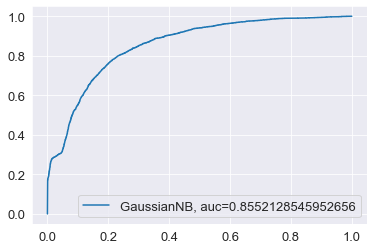

In [15]:
print("GaussianNB")
print(classification_report(y_test, resultado_gb))

resultado_gb = gb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  resultado_gb)
auc = metrics.roc_auc_score(y_test, resultado_gb)
plt.plot(fpr,tpr,label="GaussianNB, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Support Vector Classification <a class="anchor" id="SupportVectorClassification"></a>

In [16]:
# Criando modelo e treinando com os dados de treino
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
resultado_clf = clf.predict(X_test)

In [17]:
print("SVC")

print(classification_report(y_test, resultado_clf))


SVC
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     11385
           1       0.79      0.33      0.46      3696

    accuracy                           0.81     15081
   macro avg       0.80      0.65      0.67     15081
weighted avg       0.81      0.81      0.78     15081



## Logistic Regression <a class="anchor" id="LogisticRegression"></a>

In [18]:
# Criando modelo e treinando com os dados de treino
clr = LogisticRegression()
clr.fit(X_train, y_train)
# Fazendo a predição nos dados de treino
resultado_clr = clr.predict(X_test)

LogisticRegression
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     11385
           1       0.71      0.47      0.57      3696

    accuracy                           0.82     15081
   macro avg       0.78      0.71      0.73     15081
weighted avg       0.81      0.82      0.81     15081



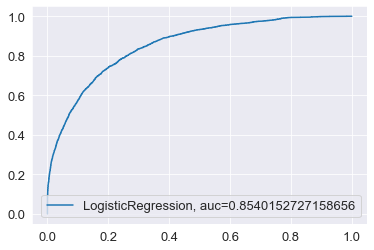

In [19]:
print("LogisticRegression")

print(classification_report(y_test, resultado_clr))

resultado_clr = clr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  resultado_clr)
auc = metrics.roc_auc_score(y_test, resultado_clr)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## KNeighborsClassifier <a class="anchor" id="KNeighborsClassifier"></a>

In [20]:
# Criando modelo e treinando com os dados de treino
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# Fazendo a predição nos dados de treino
resultado_knn = knn.predict(X_test)

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11385
           1       0.66      0.61      0.64      3696

    accuracy                           0.83     15081
   macro avg       0.77      0.76      0.76     15081
weighted avg       0.83      0.83      0.83     15081



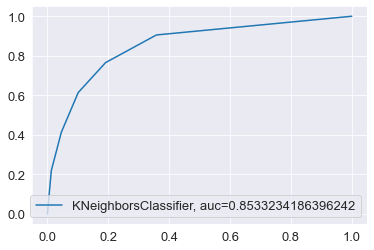

In [21]:
print("KNeighborsClassifier")
print(classification_report(y_test, resultado_knn))

resultado_knn = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  resultado_knn)
auc = metrics.roc_auc_score(y_test, resultado_knn)
plt.plot(fpr,tpr,label="KNeighborsClassifier, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## DecisionTreeClassifier <a class="anchor" id="DecisionTreeClassifier"></a>

In [22]:
# Criando modelo e treinando com os dados de treino
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
# Fazendo a predição nos dados de treino
resultado_dtc = dtc.predict(X_test)

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     11385
           1       0.61      0.62      0.61      3696

    accuracy                           0.81     15081
   macro avg       0.74      0.74      0.74     15081
weighted avg       0.81      0.81      0.81     15081



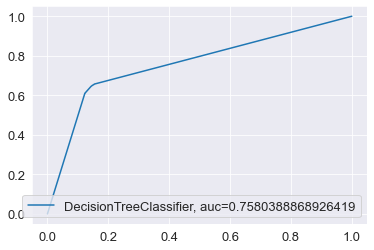

In [23]:
# Principais métricas de performance
print("DecisionTreeClassifier")

print(classification_report(y_test, resultado_dtc))

resultado_dtc = dtc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  resultado_dtc)
auc = metrics.roc_auc_score(y_test, resultado_dtc)
plt.plot(fpr,tpr,label="DecisionTreeClassifier, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [24]:
data_test = pd.read_csv("wage_test.csv")
#elimicar coluna inutil Unnamed
data_test.drop(['Unnamed: 0'], axis = 'columns', inplace = True)
#eliminar linhas com dados faltantes
data_test.drop(data_test[data_test['occupation'] == ' ?'].index, inplace = True)
data_test.drop(data_test[data_test['native_country'] == ' ?'].index, inplace = True)
data_test.drop(data_test[data_test['workclass'] == ' ?'].index, inplace = True)
#eliminar atributos que não serão utilizados
data_test=data_test.drop(['education', 'fnlwgt'], axis = 1)
#Estatisticas gerais sobre os dados
data_test.describe()



,age,education_num,capital_gain,capital_loss,hours_per_week
count,15059.000000,15059.000000,15059.000000,15059.000000,15059.000000
mean,38.769241,10.112956,1120.375988,89.047812,40.951657
std,13.380649,2.558686,7703.432212,406.296088,12.063229
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [25]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15059 entries, 0 to 16279
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15059 non-null  int64 
 1   workclass       15059 non-null  object
 2   education_num   15059 non-null  int64 
 3   marital_status  15059 non-null  object
 4   occupation      15059 non-null  object
 5   relationship    15059 non-null  object
 6   race            15059 non-null  object
 7   sex             15059 non-null  object
 8   capital_gain    15059 non-null  int64 
 9   capital_loss    15059 non-null  int64 
 10  hours_per_week  15059 non-null  int64 
 11  native_country  15059 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.0+ MB


In [26]:
le = LabelEncoder()
data_test['workclass'] = le.fit_transform(data_test['workclass'])
data_test['marital_status'] = le.fit_transform(data_test['marital_status'])
data_test['occupation'] = le.fit_transform(data_test['occupation'])
data_test['relationship'] = le.fit_transform(data_test['relationship'])
data_test['race'] = le.fit_transform(data_test['race'])
data_test['sex'] = le.fit_transform(data_test['sex'])
data_test['native_country'] = le.fit_transform(data_test['native_country'])

data_test.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,38,2,9,2,4,0,4,1,0,0,50,37
1,28,1,12,2,10,0,4,1,0,0,40,37
2,44,2,10,2,6,0,2,1,7688,0,40,37
4,34,2,6,4,7,1,4,1,0,0,30,37
6,63,4,15,2,9,0,4,1,3103,0,32,37


In [27]:
#new_resultado = gb.predict(data_test)
#predicted= pd.DataFrame({'predictedValues':new_resultado})
#writer = pd.ExcelWriter('gb.xlsx')
#predicted.to_excel(writer)
#writer.save()

In [28]:
#new_resultado = clf.predict(data_test)
#predicted= pd.DataFrame({'predictedValues':new_resultado})
#writer = pd.ExcelWriter('clf.xlsx')
#predicted.to_excel(writer)
#writer.save()

In [29]:
#new_resultado = clr.predict(data_test)
#predicted= pd.DataFrame({'predictedValues':new_resultado})
#writer = pd.ExcelWriter('clr.xlsx')
#predicted.to_excel(writer)
#writer.save()

In [30]:
new_resultado = knn.predict(data_test)
predicted= pd.DataFrame({'predictedValues':new_resultado})
writer = pd.ExcelWriter('knn.xlsx')
predicted.to_excel(writer)
writer.save()

In [31]:
#new_resultado = dtc.predict(data_test)
#predicted= pd.DataFrame({'predictedValues':new_resultado})
#writer = pd.ExcelWriter('dtc.xlsx')
#predicted.to_excel(writer)
#writer.save()